# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

#### I am going to have to scrape the each csv from the following website to get what I want: http://data.un.org/Explorer.aspx. 
#### I am looking to get info on all commodity trading within the commodity trade statistics database.
#### It looks like there are 99 csv files that I will need to scrape. I will write a text file with the link to each csv.

In [72]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import sys
import time
import pandas as pd

def latest_download_file():
      path = r'/Users/michaelrocchio/Downloads/'
      os.chdir(path)
      files = sorted(os.listdir(os.getcwd()), key=os.path.getmtime)
      newest = files[-1]
      return newest
### you have to click a js link that generates a return link in the url bar so I will only be able to do this once without updating the script. And I have to be quick about it.
### There are 99 commodity types.
completed_pages=[]
urls=[]
metadata=[]

for i in range(1,99):
    try:
        driver=webdriver.Chrome()
        driver.implicitly_wait(1)
        link="http://data.un.org/Data.aspx?d=ComTrade&f=_l1Code:{}&c=2,3,5,7,8,9,11,12&s=_crEngNameOrderBy:asc,yr:desc,_l2Code:asc&v=1".format(i)
        driver.get(link)
        metadata_element=driver.find_element(By.XPATH, '//*[@id="ctl00_main_container"]/div[2]/h2')
        meta_text=metadata_element.text
        meta_text=meta_text.replace('Search glossaries', '')
        dropdown_element=driver.find_element(By.XPATH, '//*[@id="ctl00_main_actions_download"]/a[2]')
        dropdown_element.click()
        js_element=driver.find_element(By.XPATH, '//*[@id="downloadCommaLink"]/img')
        js_element.click()
        fileends='crdownload'
        while "crdownload" == fileends:
            time.sleep(1)
            newest_file = latest_download_file()
            if "crdownload" in newest_file:
                fileends = "crdownload"
            else:
                fileends = "none"
        driver.quit()
        time.sleep(.5)
        os.rename("/Users/michaelrocchio/Downloads/{}".format(latest_download_file()), "UN_Data/UNdata{}.zip".format(i-1))
        metadata.append(meta_text)
        completed_pages.append(i)
        urls.append(link)
    except:
        print("URL Expired at page {}".format(i))
        exp_page=i-1
        sys.exit(1)

In [83]:
meta_df=pd.DataFrame({
    'Page': completed_pages,
    'URL': urls,
    'Description': metadata
})
meta_df['Description']=meta_df['Description'].str.replace('Trade of goods', '')
remove_snip=len(', US$, HS 1992, ')
meta_df['Description']=meta_df['Description'].str[remove_snip:]
meta_df.to_csv('UN_Data_Metadata.csv', index=False)
meta_df

,Page,URL,Description
0,1,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,ALL COMMODITIES
1,2,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,01 Live animals
2,3,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,02 Meat and edible meat offal
3,4,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"03 Fish, crustaceans, molluscs, aquatic inver..."
4,5,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"04 Dairy products, eggs, honey, edible animal..."
...,...,...,...
93,94,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"94 Furniture, lighting, signs, prefabricated ..."
94,95,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"95 Toys, games, sports requisites"
95,96,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,96 Miscellaneous manufactured articles
96,97,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"97 Works of art, collectors pieces and antiques"


<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

### I choose this data because I was curious to see if I could find a correlation heatmap between various commodity metrics between one and another. I think I can do this with this larger dataset. I will most likely
### have to use heavier data processing tools to achieve this which I am comforatble with. 

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

### My primary goal within this project will be to do an EDA that looks into the correlation of different types of commodities and provide a heatmap of their correlation. I may also do a clustering analysis if I am feeling fancy.

In [ ]:
import zipfile
for file in os.listdir('UN_Data'):
    if '.zip' in file:
        filename=file.replace('.zip','.csv')
        folder='folder_tmp'
        with zipfile.ZipFile('UN_Data/{}'.format(file), 'r') as zip_ref:
            zip_ref.extractall('UN_Data_Extract/folder_tmp/')
        new_file=os.listdir('UN_Data_Extract/folder_tmp/')
        os.rename('UN_Data_Extract/folder_tmp/{}'.format(new_file[0]), "UN_Data_Extract/{}".format(filename))

In [105]:
#### optimizing files
for i in os.listdir("UN_Data_Extract/"):
    parquet_name=i.replace('.csv','.parquet')
    if '.csv' in i:
        df_temp=pd.read_csv("UN_Data_Extract/{}".format(i))
        df_temp.to_parquet("UN_Data_Opt/{}".format(parquet_name))

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [107]:

### I will read the first file in.
df0=pd.read_parquet('UN_Data_Opt/UNdata0.parquet')
df0

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,ALL COMMODITIES,Import,7.406590e+09,NaN,No Quantity,0.0
1,Afghanistan,2018,ALL COMMODITIES,Export,8.845045e+08,0.0,No Quantity,0.0
2,Afghanistan,2018,ALL COMMODITIES,Re-Export,9.263097e+06,0.0,No Quantity,0.0
3,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09,NaN,No Quantity,NaN
4,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08,NaN,No Quantity,NaN
...,...,...,...,...,...,...,...,...
10139,Zimbabwe,2001,ALL COMMODITIES,Export,1.206663e+09,NaN,No Quantity,NaN
10140,Zimbabwe,2001,ALL COMMODITIES,Re-Export,1.594229e+07,NaN,No Quantity,NaN
10141,Zimbabwe,2000,ALL COMMODITIES,Export,1.879631e+09,NaN,No Quantity,NaN
10142,Zimbabwe,1995,ALL COMMODITIES,Import,2.658853e+09,NaN,No Quantity,NaN


In [112]:
import warnings
warnings.filterwarnings('ignore')
final_df=pd.DataFrame()
for i in os.listdir("UN_Data_Opt/"):
    tempdf=pd.read_parquet("UN_Data_Opt/{}".format(i))
    tempdf['origin_file']=i.replace('.parquet','')
    final_df=final_df.append(tempdf).reset_index(drop=True)
final_df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9.659279e+06,8310819.00,Weight in kilograms,8310819.00,UNdata19
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1.034729e+06,104542.60,Weight in kilograms,104542.60,UNdata19
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1.201180e+06,586785.15,Weight in kilograms,586785.15,UNdata19
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1.521576e+06,619217.12,Weight in kilograms,619217.12,UNdata19
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,6.307901e+05,290356.00,Weight in kilograms,290356.00,UNdata19
...,...,...,...,...,...,...,...,...,...
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,1.821299e+07,658146.00,Weight in kilograms,658146.00,UNdata41
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,5.147759e+07,1089197.00,Weight in kilograms,1089197.00,UNdata41
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3.972237e+06,196520.00,Weight in kilograms,196520.00,UNdata41
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,4.652490e+05,10265.00,Weight in kilograms,10265.00,UNdata41


In [113]:
### I am going to give this to you in a compressed parquet format as it is large.
final_df.to_parquet('UNdata_full.parquet.gzip', compression='gzip')

In [114]:
### it can be read in with the following code like any other parquet file.:
final_df=pd.read_parquet('UNdata_full.parquet.gzip')

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [115]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
final_df.info()
# TODO: Use the head() method to inspect the first five (or more) rows of the data
print(final_df.head(5))
# TODO: Use the tail() method to inspect the last five (or more) rows of the data]
final_df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410656 entries, 0 to 8410655
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Country or Area  object 
 1   Year             int64  
 2   Commodity        object 
 3   Flow             object 
 4   Trade (USD)      float64
 5   Weight (kg)      float64
 6   Quantity Name    object 
 7   Quantity         float64
 8   origin_file      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 577.5+ MB
  Country or Area  Year                                          Commodity  \
0     Afghanistan  2018                 Sweet biscuits, waffles and wafers   
1         Albania  2018  Infant foods of cereals, flour, starch or milk...   
2         Albania  2018  Mixes and doughs for bread, pastry, biscuits, ...   
3         Albania  2018  Malt extract & limited cocoa pastrycooks produ...   
4         Albania  2018         Uncooked egg pasta not stuffed or prepared   

     Flow   Trade (USD)  

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,18212990.0,658146.0,Weight in kilograms,658146.0,UNdata41
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,51477587.0,1089197.0,Weight in kilograms,1089197.0,UNdata41
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3972237.0,196520.0,Weight in kilograms,196520.0,UNdata41
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,465249.0,10265.0,Weight in kilograms,10265.0,UNdata41
8410655,Sweden,2012,"Sheep or lamb skin leather, nes",Import,766658.0,11214.0,Weight in kilograms,11214.0,UNdata41


<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

#### The primary thing that I hope to learn from this data is what commodities have similar correlations in index prices.
#### I have a hunch, based on general economic understanding, that certian types of commodities are correlated with one and another in the area of prices per unit which I will have to calculate
#### I will also eventually seperate the dataset into an import and export dataset. 

In [1]:
import pandas as pd
df=pd.read_parquet("UNdata_full.parquet.gzip")
df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9.659279e+06,8310819.00,Weight in kilograms,8310819.00,UNdata19
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1.034729e+06,104542.60,Weight in kilograms,104542.60,UNdata19
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1.201180e+06,586785.15,Weight in kilograms,586785.15,UNdata19
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1.521576e+06,619217.12,Weight in kilograms,619217.12,UNdata19
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,6.307901e+05,290356.00,Weight in kilograms,290356.00,UNdata19
...,...,...,...,...,...,...,...,...,...
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,1.821299e+07,658146.00,Weight in kilograms,658146.00,UNdata41
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,5.147759e+07,1089197.00,Weight in kilograms,1089197.00,UNdata41
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3.972237e+06,196520.00,Weight in kilograms,196520.00,UNdata41
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,4.652490e+05,10265.00,Weight in kilograms,10265.00,UNdata41


In [2]:
df['Year'].unique().shape[0]

32

In [3]:
##### Due to inflation and the fact that the data is in US dollars, I will only be looking at data begginning at 2000.as_integer_ratio
df=df[df['Year']>=2000].reset_index(drop=True)
df.shape

(6474076, 9)

In [4]:
meta=pd.read_csv("UN_Data_Metadata.csv")
meta

,Page,URL,Description
0,1,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,ALL COMMODITIES
1,2,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,01 Live animals
2,3,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,02 Meat and edible meat offal
3,4,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"03 Fish, crustaceans, molluscs, aquatic inver..."
4,5,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"04 Dairy products, eggs, honey, edible animal..."
...,...,...,...
93,94,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"94 Furniture, lighting, signs, prefabricated ..."
94,95,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"95 Toys, games, sports requisites"
95,96,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,96 Miscellaneous manufactured articles
96,97,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"97 Works of art, collectors pieces and antiques"


In [5]:
print("Unique Countries: {}".format(df['Country or Area'].nunique()))

Unique Countries: 201


In [6]:
print("Unique Years: {}".format(df['Year'].sort_values().nunique()))

Unique Years: 20


In [7]:
print("Unique Countries: {}".format(meta['Description'].nunique()))

Unique Countries: 98


<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

#### The overall population of the data being represented is the import and exports for each country. 

In [8]:
print("The total sample size is {}".format(df.shape[0]))

The total sample size is 6474076


<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

 ##### This data was collected by each country reporting their own numbers. As this is a comprehensive aggregated dataset no weighting of the sample set was done. 

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474076 entries, 0 to 6474075
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Country or Area  object 
 1   Year             int64  
 2   Commodity        object 
 3   Flow             object 
 4   Trade (USD)      float64
 5   Weight (kg)      float64
 6   Quantity Name    object 
 7   Quantity         float64
 8   origin_file      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 444.5+ MB


## Data Dictionary
##### Country or Area: This displays the country or entity that is importing/ exporting the listed good.
##### Year: This is the year that the imports/ exports were aggregated at.
##### Commodity: This field contains the name of the commodity. Handling the variability within the field will be the most difficult part of my analysis.
##### Flow: This shows if the row contains either information on an import or export from the country.
##### Trade (USD): This field displays the total inflow/outlow of the commodity in us dollars. I may account for inflationary pressures in the later part of my analysis if I deem it necessary. But most likely I will contain the analysis to individual years.
##### Weight (kg): This contains the totaly shipping weight of the commodity. I will not be using this in my analysis.
##### Quantity Name: This displays the units for the quantity field. I will have to be careful with this field but I intend to compare distributions in the specific commodity so it will not have an impact unless it differs from country to country which the data source says it does not. 
##### Quantity: This contains the physical count of the unit displayed in the quantity field.
##### orgin_file: this was a field I added while parsing the UN website and is the file number of the commodity grouping listed on the UN website. 

<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull().T, cmap='viridis')
plt.show()

##### It is looking like this dataset is quite clean already and I am not thinking that much cleaning work will need to be done. 
#### So it appears that there are null values within the Weight and Quantity columns. I will need one of these two to determine a baseline value as I do my further analysis.
#### I am going to remove all values that do not have a quantity value and use that as my baseline for now. I will alwo remove the weight column as it is not needed for my analysis.

In [8]:
del df['Weight (kg)']

In [9]:
print(df.shape)
df=df[df['Quantity'].isnull()==False]
# df=df.dropna(subset=['Quantity'])
print(df.shape)

(6474076, 8)
(6193858, 8)


In [10]:
#### As we can see above undata88 has some pretty heavy outliers. I will inspect it first.

In [11]:
import matplotlib.pyplot as plt

df['Quantity'].describe().apply(lambda x: format(x, 'f'))

count           6193858.000000
mean           55181364.219641
std         25542871978.241184
min                   0.000000
25%                 936.000000
50%               25481.000000
75%              464080.000000
max      60873365597449.000000
Name: Quantity, dtype: object

In [12]:
df['Trade (USD)'].describe().apply(lambda x: format(x, 'f'))

count          6193858.000000
mean          56770534.780282
std         5637074754.627261
min                  0.001806
25%              10907.245599
50%             161900.000000
75%            2119551.945291
max      2611432490157.000000
Name: Trade (USD), dtype: object

#### For each of these values I will now cut out any zero fields as they wont be useful for my analysis. I will also round the variables to the nearest whole number. 
#### This is alright for USD because it is the overall amount of trade.


In [13]:
print(df.shape)
df['Quantity']=round(df['Quantity'],0)
df['Trade (USD)']=round(df['Trade (USD)'],0)

df=df[df['Quantity']!=0]
df=df[df['Trade (USD)']!=0]
print(df.shape)


(6193858, 8)
(6066204, 8)


##### As we can see above, there are some pretty extreme outliers for all three of the numeric variables. However I am hesitant to cut them out at this time. 
##### I will need to do some more research on the data to determine if these values are useful to my analysis or not. I suspect that they will be. 

In [14]:
#### I will now create a price per unit column to help with my analysis.
df['price_unit']=df['Trade (USD)']/df['Quantity']
df['price_unit'].describe().apply(lambda x: format(x, 'f'))

count       6066204.000000
mean          31256.225821
std         3203255.642376
min               0.000000
25%               1.556569
50%               4.805522
75%              16.295174
max      6200551566.000000
Name: price_unit, dtype: object

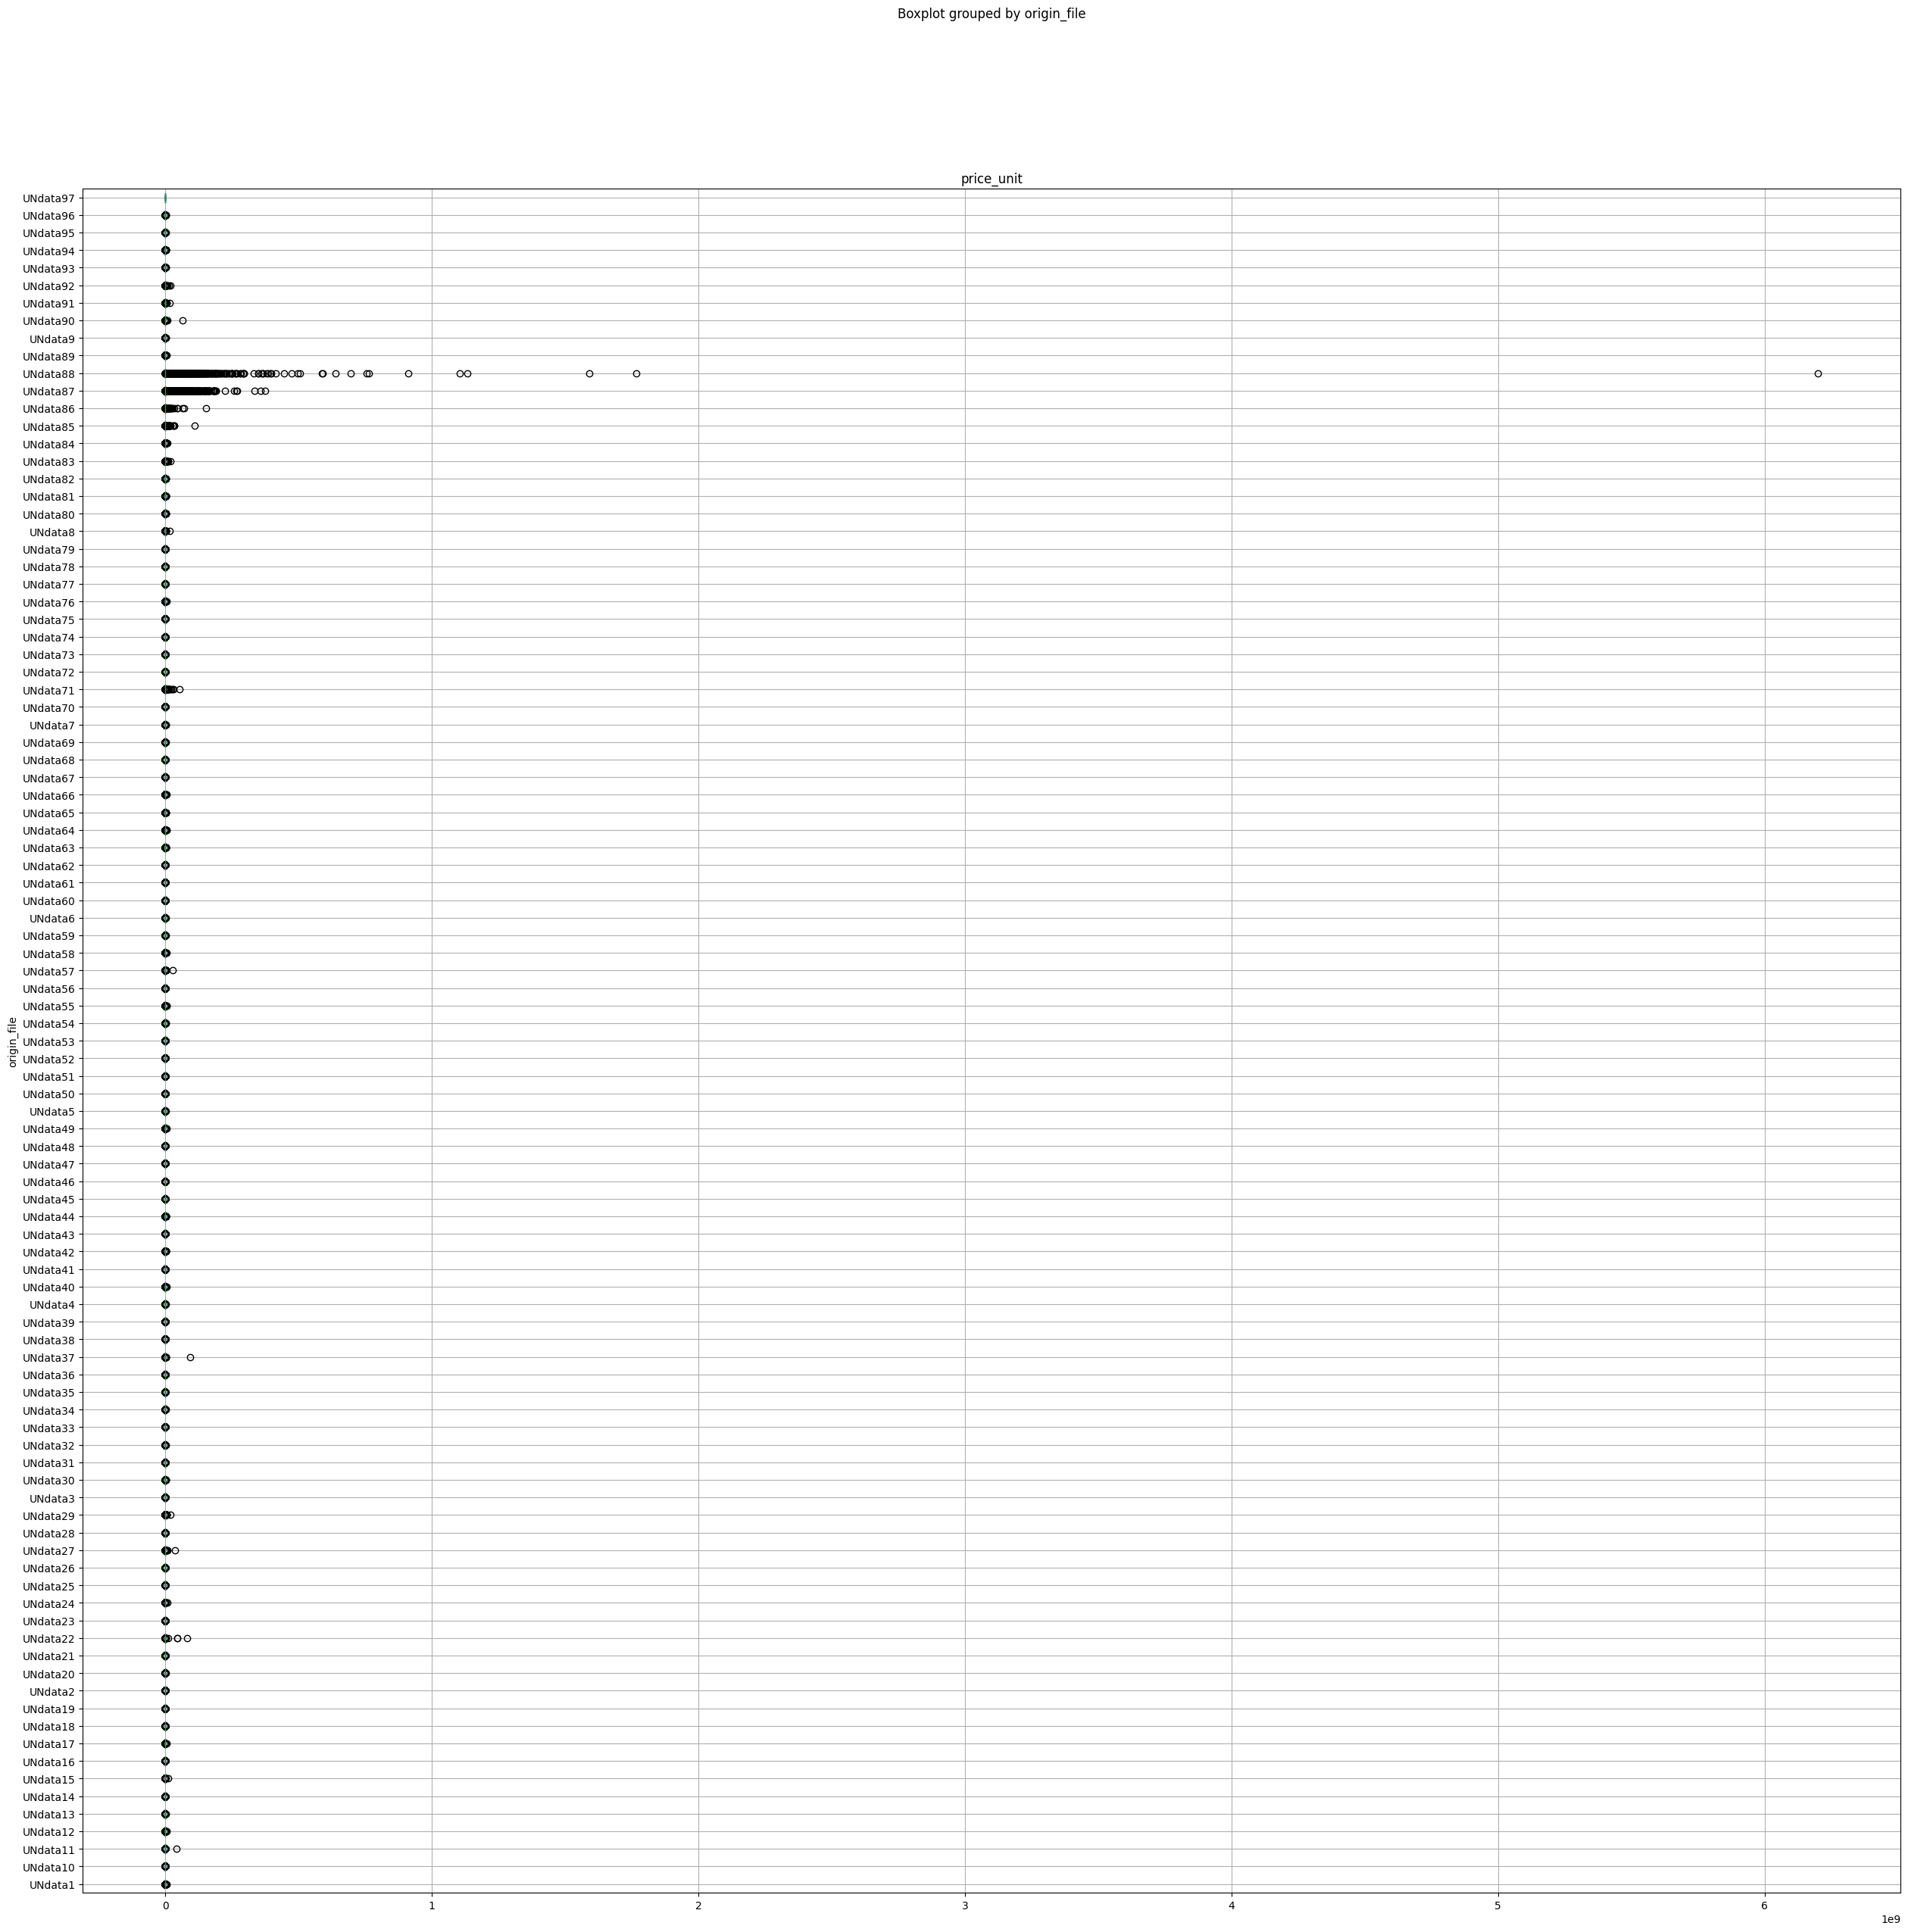

In [15]:
##### To remove outliers we will need to look at the distributions of each commodity. This will get messy fast.

fig, ax = plt.subplots(figsize=(30,30))
df.boxplot(column='price_unit', by='origin_file', ax=ax, vert=False)
plt.show()

#### As we can see above undata88 has some pretty heavy outliers. I will inspect it first.

In [16]:
undata88=df[df['origin_file']=='UNdata88']
undata88.sort_values(by='price_unit', ascending=False).head(10)

,Country or Area,Year,Commodity,Flow,Trade (USD),Quantity Name,Quantity,origin_file,price_unit
3815812,Australia,2017,"Floating, submersible drilling or production p...",Import,6.200552e+09,Number of items,1.0,UNdata88,6.200552e+09
3842191,Italy,2008,"Floating, submersible drilling or production p...",Import,1.766915e+09,Number of items,1.0,UNdata88,1.766915e+09
3854606,Norway,2011,"Floating, submersible drilling or production p...",Import,1.590958e+09,Number of items,1.0,UNdata88,1.590958e+09
3854498,Norway,2015,"Floating, submersible drilling or production p...",Import,2.265408e+09,Number of items,2.0,UNdata88,1.132704e+09
3821551,Brazil,2013,"Floating, submersible drilling or production p...",Export,7.734507e+09,Number of items,7.0,UNdata88,1.104930e+09
3821416,Brazil,2018,"Floating docks, special function vessels nes",Re-Import,3.644270e+09,Number of items,4.0,UNdata88,9.110675e+08
3842028,Italy,2013,"Floating, submersible drilling or production p...",Import,7.636309e+08,Number of items,1.0,UNdata88,7.636309e+08
3821495,Brazil,2015,"Floating docks, special function vessels nes",Export,1.508510e+09,Number of items,2.0,UNdata88,7.542549e+08
3825616,China,2009,"Floating, submersible drilling or production p...",Import,6.962741e+08,Number of items,1.0,UNdata88,6.962741e+08
3854444,Norway,2017,"Floating, submersible drilling or production p...",Import,1.278325e+09,Number of items,2.0,UNdata88,6.391623e+08


#### This makes sense as countries will spend alot on drilling equiptment. I do not want to remove this variable because I would like to see if it has any correlation on oil prices. Eg. would the increased investment 
#### from the country result in an immediate increase in the oil exports from the country?

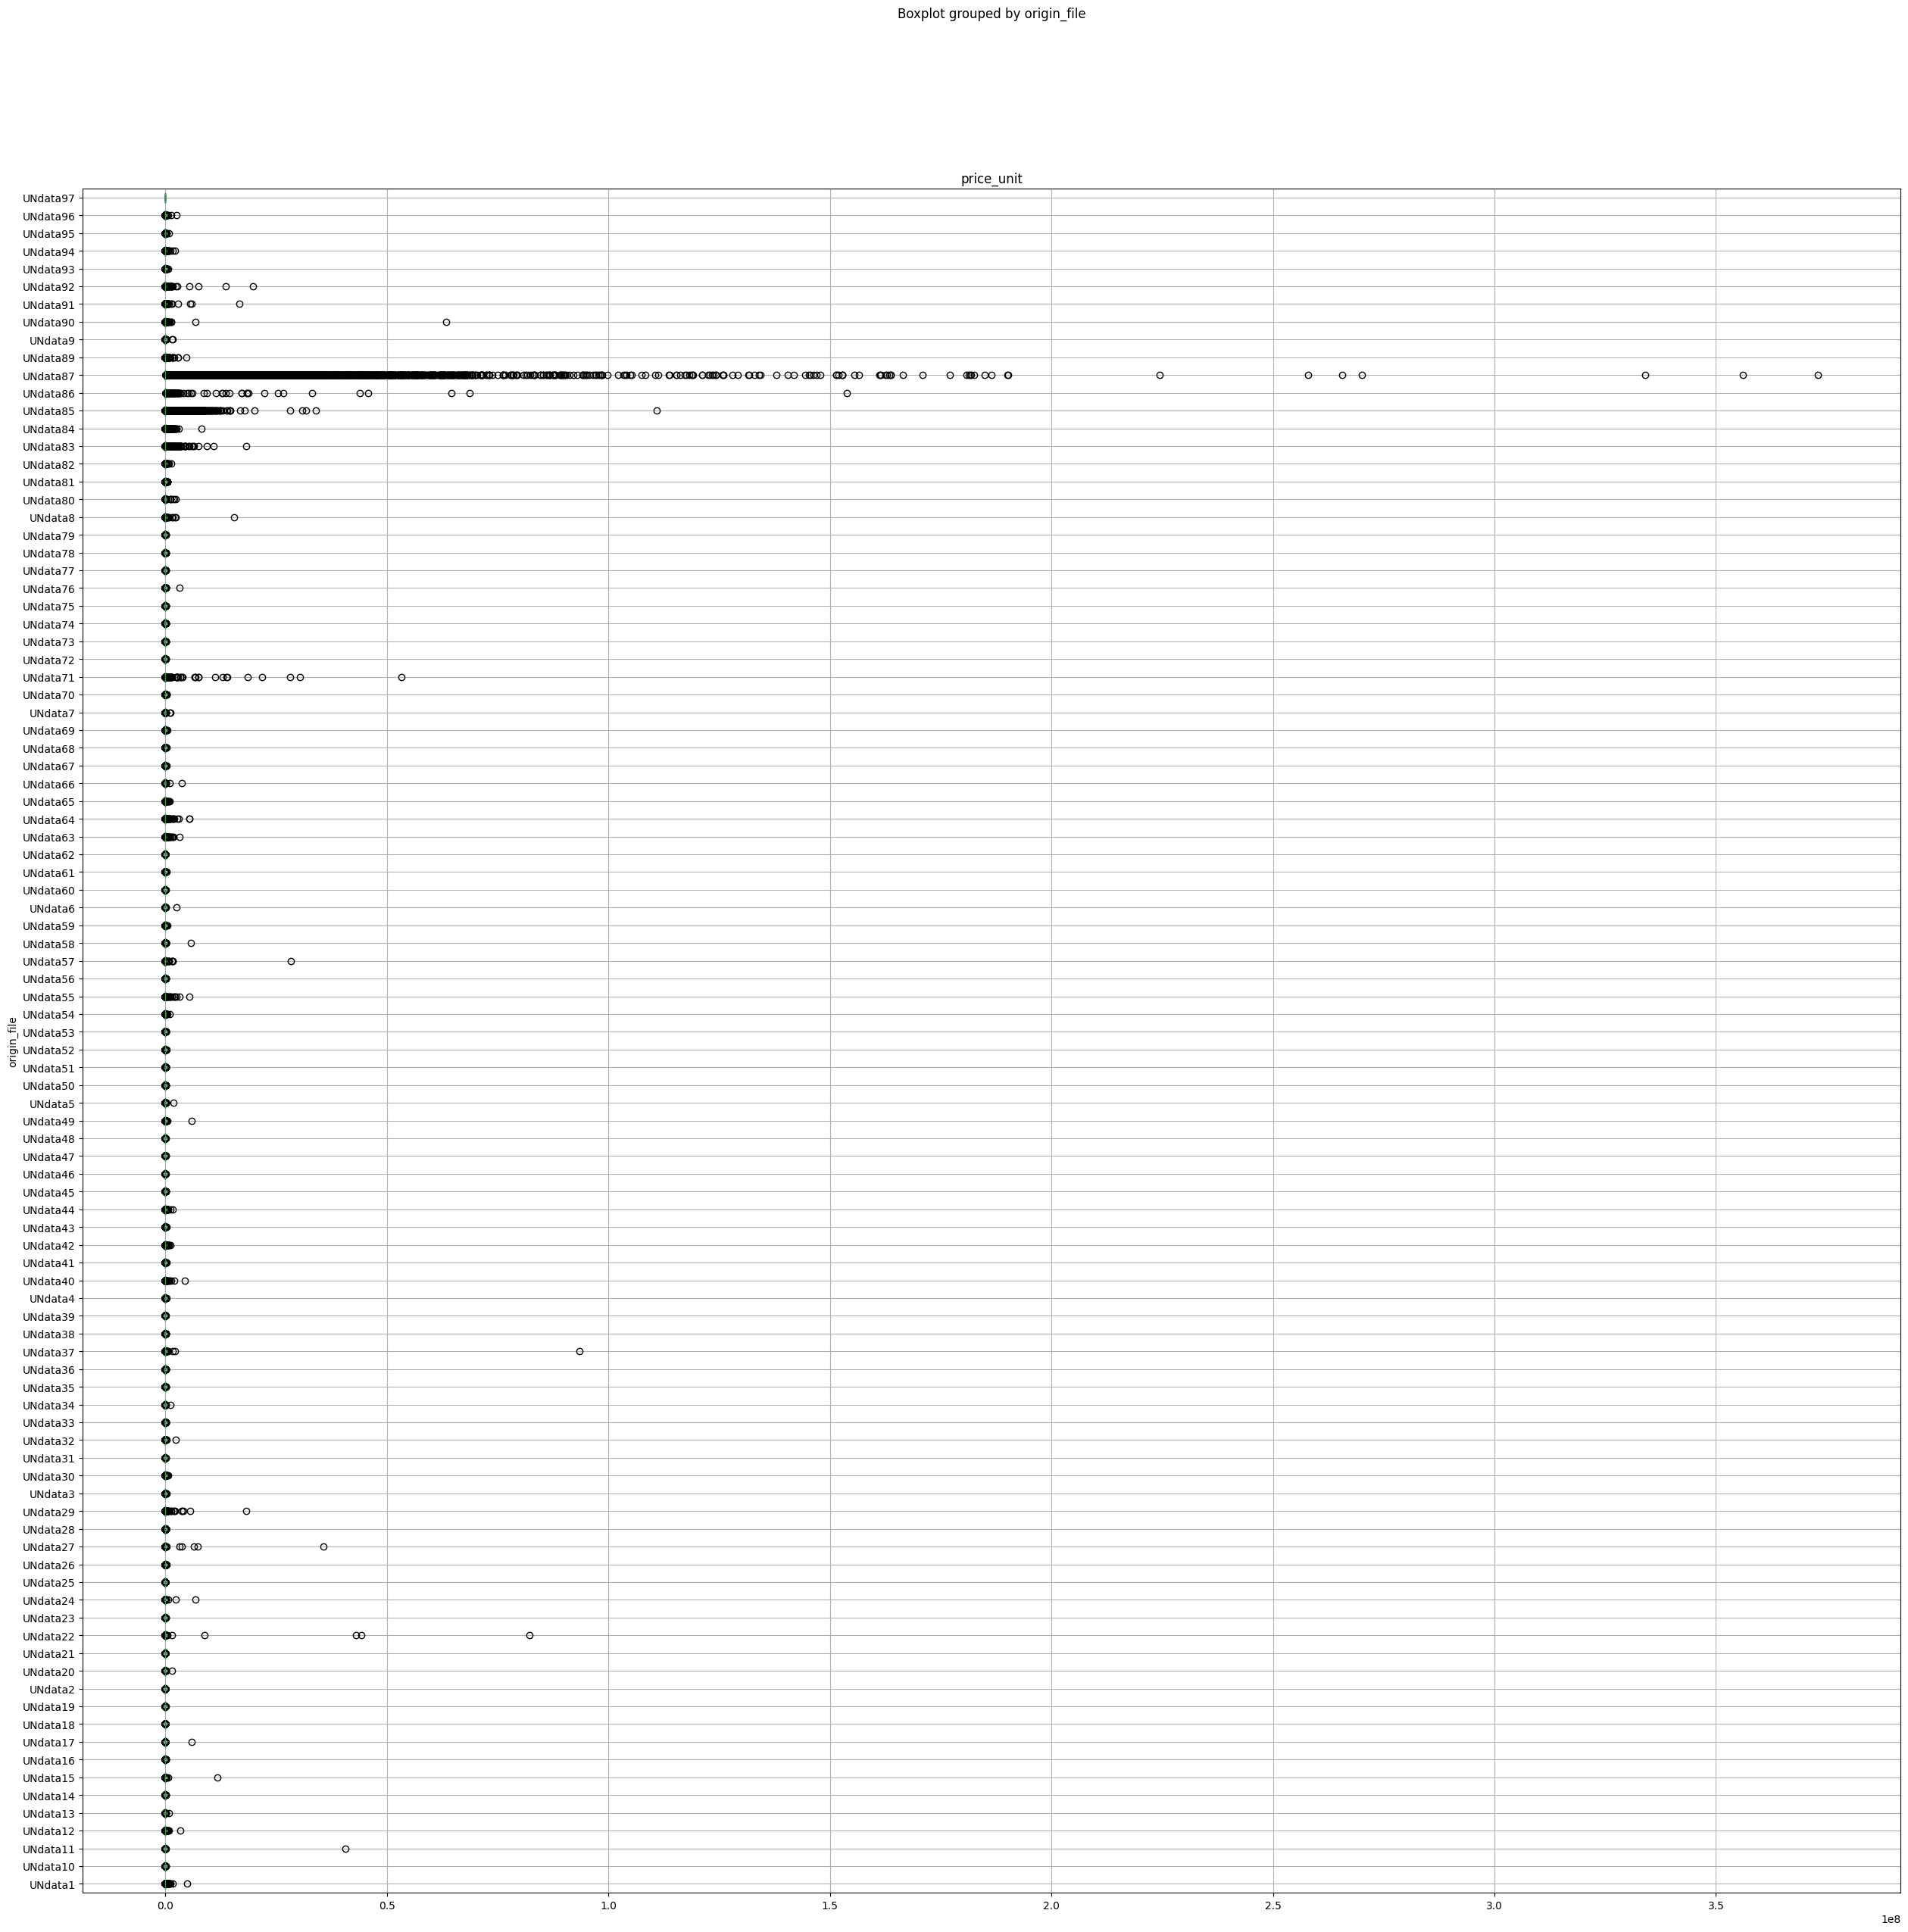

In [17]:
##### Because the UNdata88 is causing the graph to be so skewed, I will remove it from the graph and then look at the rest of the data

fig, ax = plt.subplots(figsize=(30,30))
df[df['origin_file']!='UNdata88'].boxplot(column='price_unit', by='origin_file', ax=ax, vert=False)
plt.show()

In [18]:
##### Next lets look at UNdata87.
undata87=df[df['origin_file']=='UNdata87']
undata87.sort_values(by='price_unit', ascending=False).head(10)

,Country or Area,Year,Commodity,Flow,Trade (USD),Quantity Name,Quantity,origin_file,price_unit
1005156,Luxembourg,2011,"Spacecraft, satellites and spacecraft launch v...",Import,3.730471e+08,Number of items,1.0,UNdata87,3.730471e+08
1012776,"Other Asia, nes",2013,"Fixed wing aircraft, unladen weight > 15,000 kg",Import,3.560422e+08,Number of items,1.0,UNdata87,3.560422e+08
1005106,Luxembourg,2013,"Spacecraft, satellites and spacecraft launch v...",Import,3.340926e+08,Number of items,1.0,UNdata87,3.340926e+08
1021830,Spain,2014,"Fixed wing aircraft, unladen weight > 15,000 kg",Export,1.080418e+09,Number of items,4.0,UNdata87,2.701046e+08
987057,China,2018,"Spacecraft, satellites and spacecraft launch v...",Export,1.062695e+09,Number of items,4.0,UNdata87,2.656738e+08
1005231,Luxembourg,2008,"Spacecraft, satellites and spacecraft launch v...",Import,2.580150e+08,Number of items,1.0,UNdata87,2.580150e+08
1019925,Singapore,2008,"Fixed wing aircraft, unladen weight > 15,000 kg",Import,3.591348e+09,Number of items,16.0,UNdata87,2.244593e+08
1012905,"Other Asia, nes",2009,"Fixed wing aircraft, unladen weight > 15,000 kg",Import,1.901941e+08,Number of items,1.0,UNdata87,1.901941e+08
1028148,USA,2015,"Fixed wing aircraft, unladen weight > 15,000 kg",Export,1.520109e+09,Number of items,8.0,UNdata87,1.900136e+08
1005104,Luxembourg,2013,"Fixed wing aircraft, unladen weight > 15,000 kg",Import,1.305276e+09,Number of items,7.0,UNdata87,1.864681e+08


##### These are satalite parts so I would expect a high distribution of prices. I will leave these in the data set.

##### Lets continue with both the high variation variables removed.

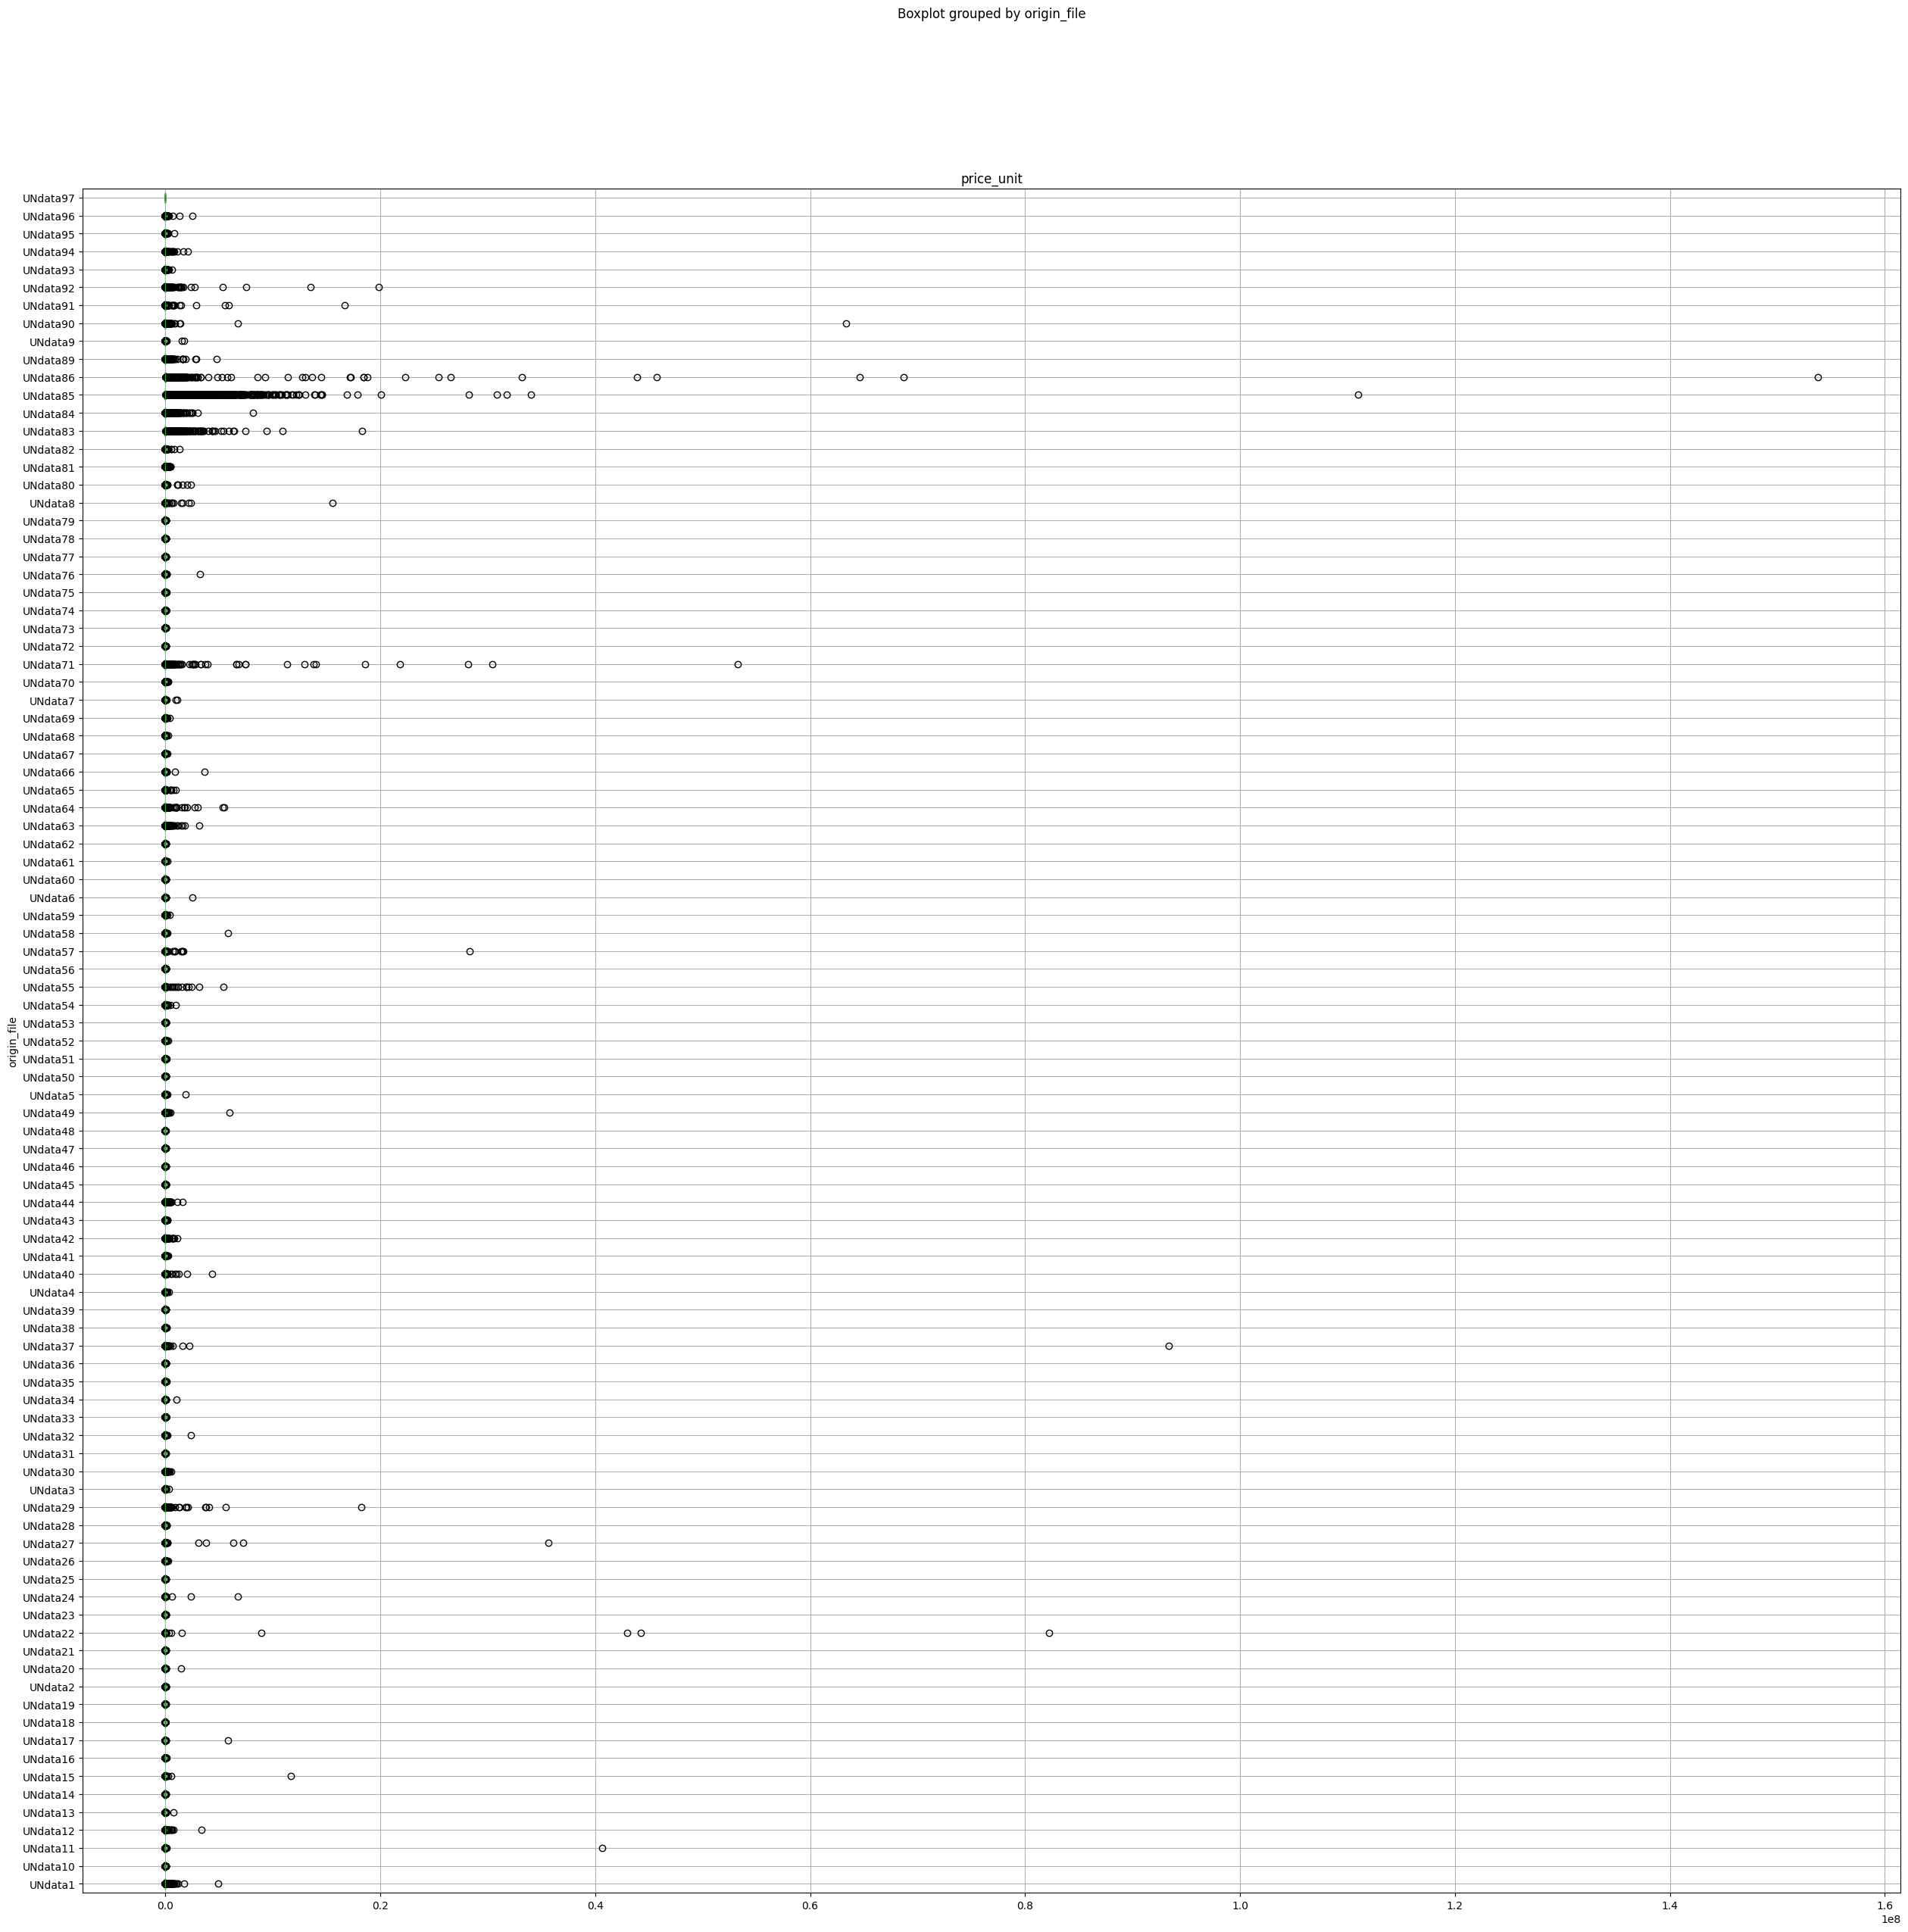

In [19]:
fig, ax = plt.subplots(figsize=(30,30))
df[~df['origin_file'].isin(['UNdata87', 'UNdata88'])].boxplot(column='price_unit', by='origin_file', ax=ax, vert=False)
plt.show()

#### This dataset looks pretty clean. We have all variables above 1.5 standard deviations from the mean explained and accounted for. 
#### Purchases of drilling equiptment, cruse ships, and space equiptment will have large deviations in the prices depending if they are parts or if they are for enitre systems, ships, rockets, etc.

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

In [1]:
df.to_parquet('UNdata_full_clean.parquet.gzip', compression='gzip')

NameError: name 'df' is not defined

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

In [1]:
### I am going to spool an AWS instance because my mac might not cut it for this
import subprocess
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Address sizes:                   46 bits physical, 48 bits virtual
Byte Order:                      Little Endian
CPU(s):                          32
On-line CPU(s) list:             0-31
Vendor ID:                       GenuineIntel
Model name:                      Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
CPU family:                      6
Model:                           85
Thread(s) per core:              2
Core(s) per socket:              16
Socket(s):                       1
Stepping:                        7
BogoMIPS:                        5000.01
Flags:                           fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave a

In [2]:
import pandas as pd
df=pd.read_parquet('UNdata_full_clean.parquet.gzip')
df

,Country or Area,Year,Commodity,Flow,Trade (USD),Quantity Name,Quantity,origin_file,price_unit
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9659279.0,Weight in kilograms,8310819.0,UNdata19,1.162254
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1034729.0,Weight in kilograms,104543.0,UNdata19,9.897640
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1201180.0,Weight in kilograms,586785.0,UNdata19,2.047053
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1521576.0,Weight in kilograms,619217.0,UNdata19,2.457258
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,630790.0,Weight in kilograms,290356.0,UNdata19,2.172471
...,...,...,...,...,...,...,...,...,...
6474071,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,18212990.0,Weight in kilograms,658146.0,UNdata41,27.673176
6474072,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,51477587.0,Weight in kilograms,1089197.0,UNdata41,47.261962
6474073,Sweden,2012,"Bovine and equine leather, nes",Import,3972237.0,Weight in kilograms,196520.0,UNdata41,20.212889
6474074,Sweden,2012,"Bovine and equine leather, nes",Export,465249.0,Weight in kilograms,10265.0,UNdata41,45.323819


In [3]:
df['Year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 2019])

In [98]:
### seperating imports and exports
df['key']=df.origin_file.str.extract('(\d+)').astype(int)
# df_agg=df.groupby(['Country or Area', 'Year', 'Flow', 'key'], as_index=False)[['Trade (USD)']].sum()
df_agg=df.copy()

In [99]:
meta=pd.read_csv("UN_Data_Metadata.csv")
meta=meta[meta['Description'].str.contains('ALL COMMODITIES')==False]
meta['key'] = meta.Description.str.extract('(\d+)').astype(int)
del meta['URL']
del meta['Page']
df_agg=df_agg.merge(meta, on='key', how='inner')
df_agg

,Country or Area,Year,Commodity,Flow,Trade (USD),Quantity Name,Quantity,origin_file,price_unit,key,Description
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9659279.0,Weight in kilograms,8310819.0,UNdata19,1.162254,19,"19 Cereal, flour, starch, milk preparations a..."
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1034729.0,Weight in kilograms,104543.0,UNdata19,9.897640,19,"19 Cereal, flour, starch, milk preparations a..."
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1201180.0,Weight in kilograms,586785.0,UNdata19,2.047053,19,"19 Cereal, flour, starch, milk preparations a..."
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1521576.0,Weight in kilograms,619217.0,UNdata19,2.457258,19,"19 Cereal, flour, starch, milk preparations a..."
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,630790.0,Weight in kilograms,290356.0,UNdata19,2.172471,19,"19 Cereal, flour, starch, milk preparations a..."
...,...,...,...,...,...,...,...,...,...,...,...
6034785,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,18212990.0,Weight in kilograms,658146.0,UNdata41,27.673176,41,41 Raw hides and skins (other than furskins) ...
6034786,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,51477587.0,Weight in kilograms,1089197.0,UNdata41,47.261962,41,41 Raw hides and skins (other than furskins) ...
6034787,Sweden,2012,"Bovine and equine leather, nes",Import,3972237.0,Weight in kilograms,196520.0,UNdata41,20.212889,41,41 Raw hides and skins (other than furskins) ...
6034788,Sweden,2012,"Bovine and equine leather, nes",Export,465249.0,Weight in kilograms,10265.0,UNdata41,45.323819,41,41 Raw hides and skins (other than furskins) ...


### I now need to make my data have multiple columns instead of rows

In [102]:
df_agg=df_agg.reset_index()
df_analysis = df_agg.pivot(index=['index', 'Country or Area', 'Year', 'Flow', 'Commodity'], columns='Description', values='price_unit').fillna(0)
df_analysis=df_analysis.reset_index()
df_analysis

Description,index,Country or Area,Year,Flow,Commodity,01 Live animals,02 Meat and edible meat offal,"03 Fish, crustaceans, molluscs, aquatic invertebrates ne","04 Dairy products, eggs, honey, edible animal product nes","05 Products of animal origin, nes",...,"88 Aircraft, spacecraft, and parts thereof","89 Ships, boats and other floating structures","90 Optical, photo, technical, medical, etc apparatus",91 Clocks and watches and parts thereof,"92 Musical instruments, parts and accessories","93 Arms and ammunition, parts and accessories thereof","94 Furniture, lighting, signs, prefabricated buildings","95 Toys, games, sports requisites",96 Miscellaneous manufactured articles,"97 Works of art, collectors pieces and antiques"
0,0,Afghanistan,2018,Import,"Sweet biscuits, waffles and wafers",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Albania,2018,Import,"Infant foods of cereals, flour, starch or milk...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Albania,2018,Import,"Mixes and doughs for bread, pastry, biscuits, ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Albania,2018,Import,Malt extract & limited cocoa pastrycooks produ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Albania,2018,Import,Uncooked egg pasta not stuffed or prepared,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034785,6034785,Sweden,2012,Import,"Bovine and equine leather, full or split grain...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034786,6034786,Sweden,2012,Export,"Bovine and equine leather, full or split grain...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034787,6034787,Sweden,2012,Import,"Bovine and equine leather, nes",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034788,6034788,Sweden,2012,Export,"Bovine and equine leather, nes",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
imports = df_analysis[df_analysis['Flow']=='Import']
exports = df_analysis[df_analysis['Flow']=='Export']
imports

Description,index,Country or Area,Year,Flow,Commodity,01 Live animals,02 Meat and edible meat offal,"03 Fish, crustaceans, molluscs, aquatic invertebrates ne","04 Dairy products, eggs, honey, edible animal product nes","05 Products of animal origin, nes",...,"88 Aircraft, spacecraft, and parts thereof","89 Ships, boats and other floating structures","90 Optical, photo, technical, medical, etc apparatus",91 Clocks and watches and parts thereof,"92 Musical instruments, parts and accessories","93 Arms and ammunition, parts and accessories thereof","94 Furniture, lighting, signs, prefabricated buildings","95 Toys, games, sports requisites",96 Miscellaneous manufactured articles,"97 Works of art, collectors pieces and antiques"
0,0,Afghanistan,2018,Import,"Sweet biscuits, waffles and wafers",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Albania,2018,Import,"Infant foods of cereals, flour, starch or milk...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Albania,2018,Import,"Mixes and doughs for bread, pastry, biscuits, ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Albania,2018,Import,Malt extract & limited cocoa pastrycooks produ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Albania,2018,Import,Uncooked egg pasta not stuffed or prepared,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034781,6034781,Sweden,2012,Import,Raw hide/skins except bovine/equine/sheep/goat...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034783,6034783,Sweden,2012,Import,"Bovine and equine leather, tanned or retanned,...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034785,6034785,Sweden,2012,Import,"Bovine and equine leather, full or split grain...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034787,6034787,Sweden,2012,Import,"Bovine and equine leather, nes",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lets look at correlations for both imports and exports for all years

In [104]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_least_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Imports Correlation")
sns.heatmap(imports.iloc[:, 3:].corr())
plt.show()

/tmp/ipykernel_12700/2901295003.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(imports.iloc[:, 3:].corr())


In [ ]:
print('Highest Correlated Categories:')
get_top_abs_correlations(imports.iloc[:, 3:], n=20)

Highest Correlated Categories:


Description                                                Description                                              
 61 Articles of apparel, accessories, knit or crochet       62 Articles of apparel, accessories, not knit or crochet    0.985322
 68 Stone, plaster, cement, asbestos, mica, etc articles    93 Arms and ammunition, parts and accessories thereof       0.975601
 20 Vegetable, fruit, nut, etc food preparations            68 Stone, plaster, cement, asbestos, mica, etc articles     0.966559
 76 Aluminium and articles thereof                          82 Tools, implements, cutlery, etc of base metal            0.963349
 20 Vegetable, fruit, nut, etc food preparations            93 Arms and ammunition, parts and accessories thereof       0.960284
 08 Edible fruit, nuts, peel of citrus fruit, melons        68 Stone, plaster, cement, asbestos, mica, etc articles     0.958571
 12 Oil seed, oleagic fruits, grain, seed, fruit, etc, ne   26 Ores, slag and ash                            

In [ ]:
print('Least Correlated Categories:')
get_least_abs_correlations(imports.iloc[:, 3:], n=20)

Least Correlated Categories:


Description                                                Description                                              
 03 Fish, crustaceans, molluscs, aquatic invertebrates ne   83 Miscellaneous articles of base metal                     0.000161
 52 Cotton                                                  83 Miscellaneous articles of base metal                     0.000262
 67 Bird skin, feathers, artificial flowers, human hair     84 Nuclear reactors, boilers, machinery, etc                0.000347
 83 Miscellaneous articles of base metal                    94 Furniture, lighting, signs, prefabricated buildings      0.000364
 29 Organic chemicals                                       88 Aircraft, spacecraft, and parts thereof                  0.000712
 84 Nuclear reactors, boilers, machinery, etc               87 Vehicles other than railway, tramway                     0.000800
 08 Edible fruit, nuts, peel of citrus fruit, melons        83 Miscellaneous articles of base metal          

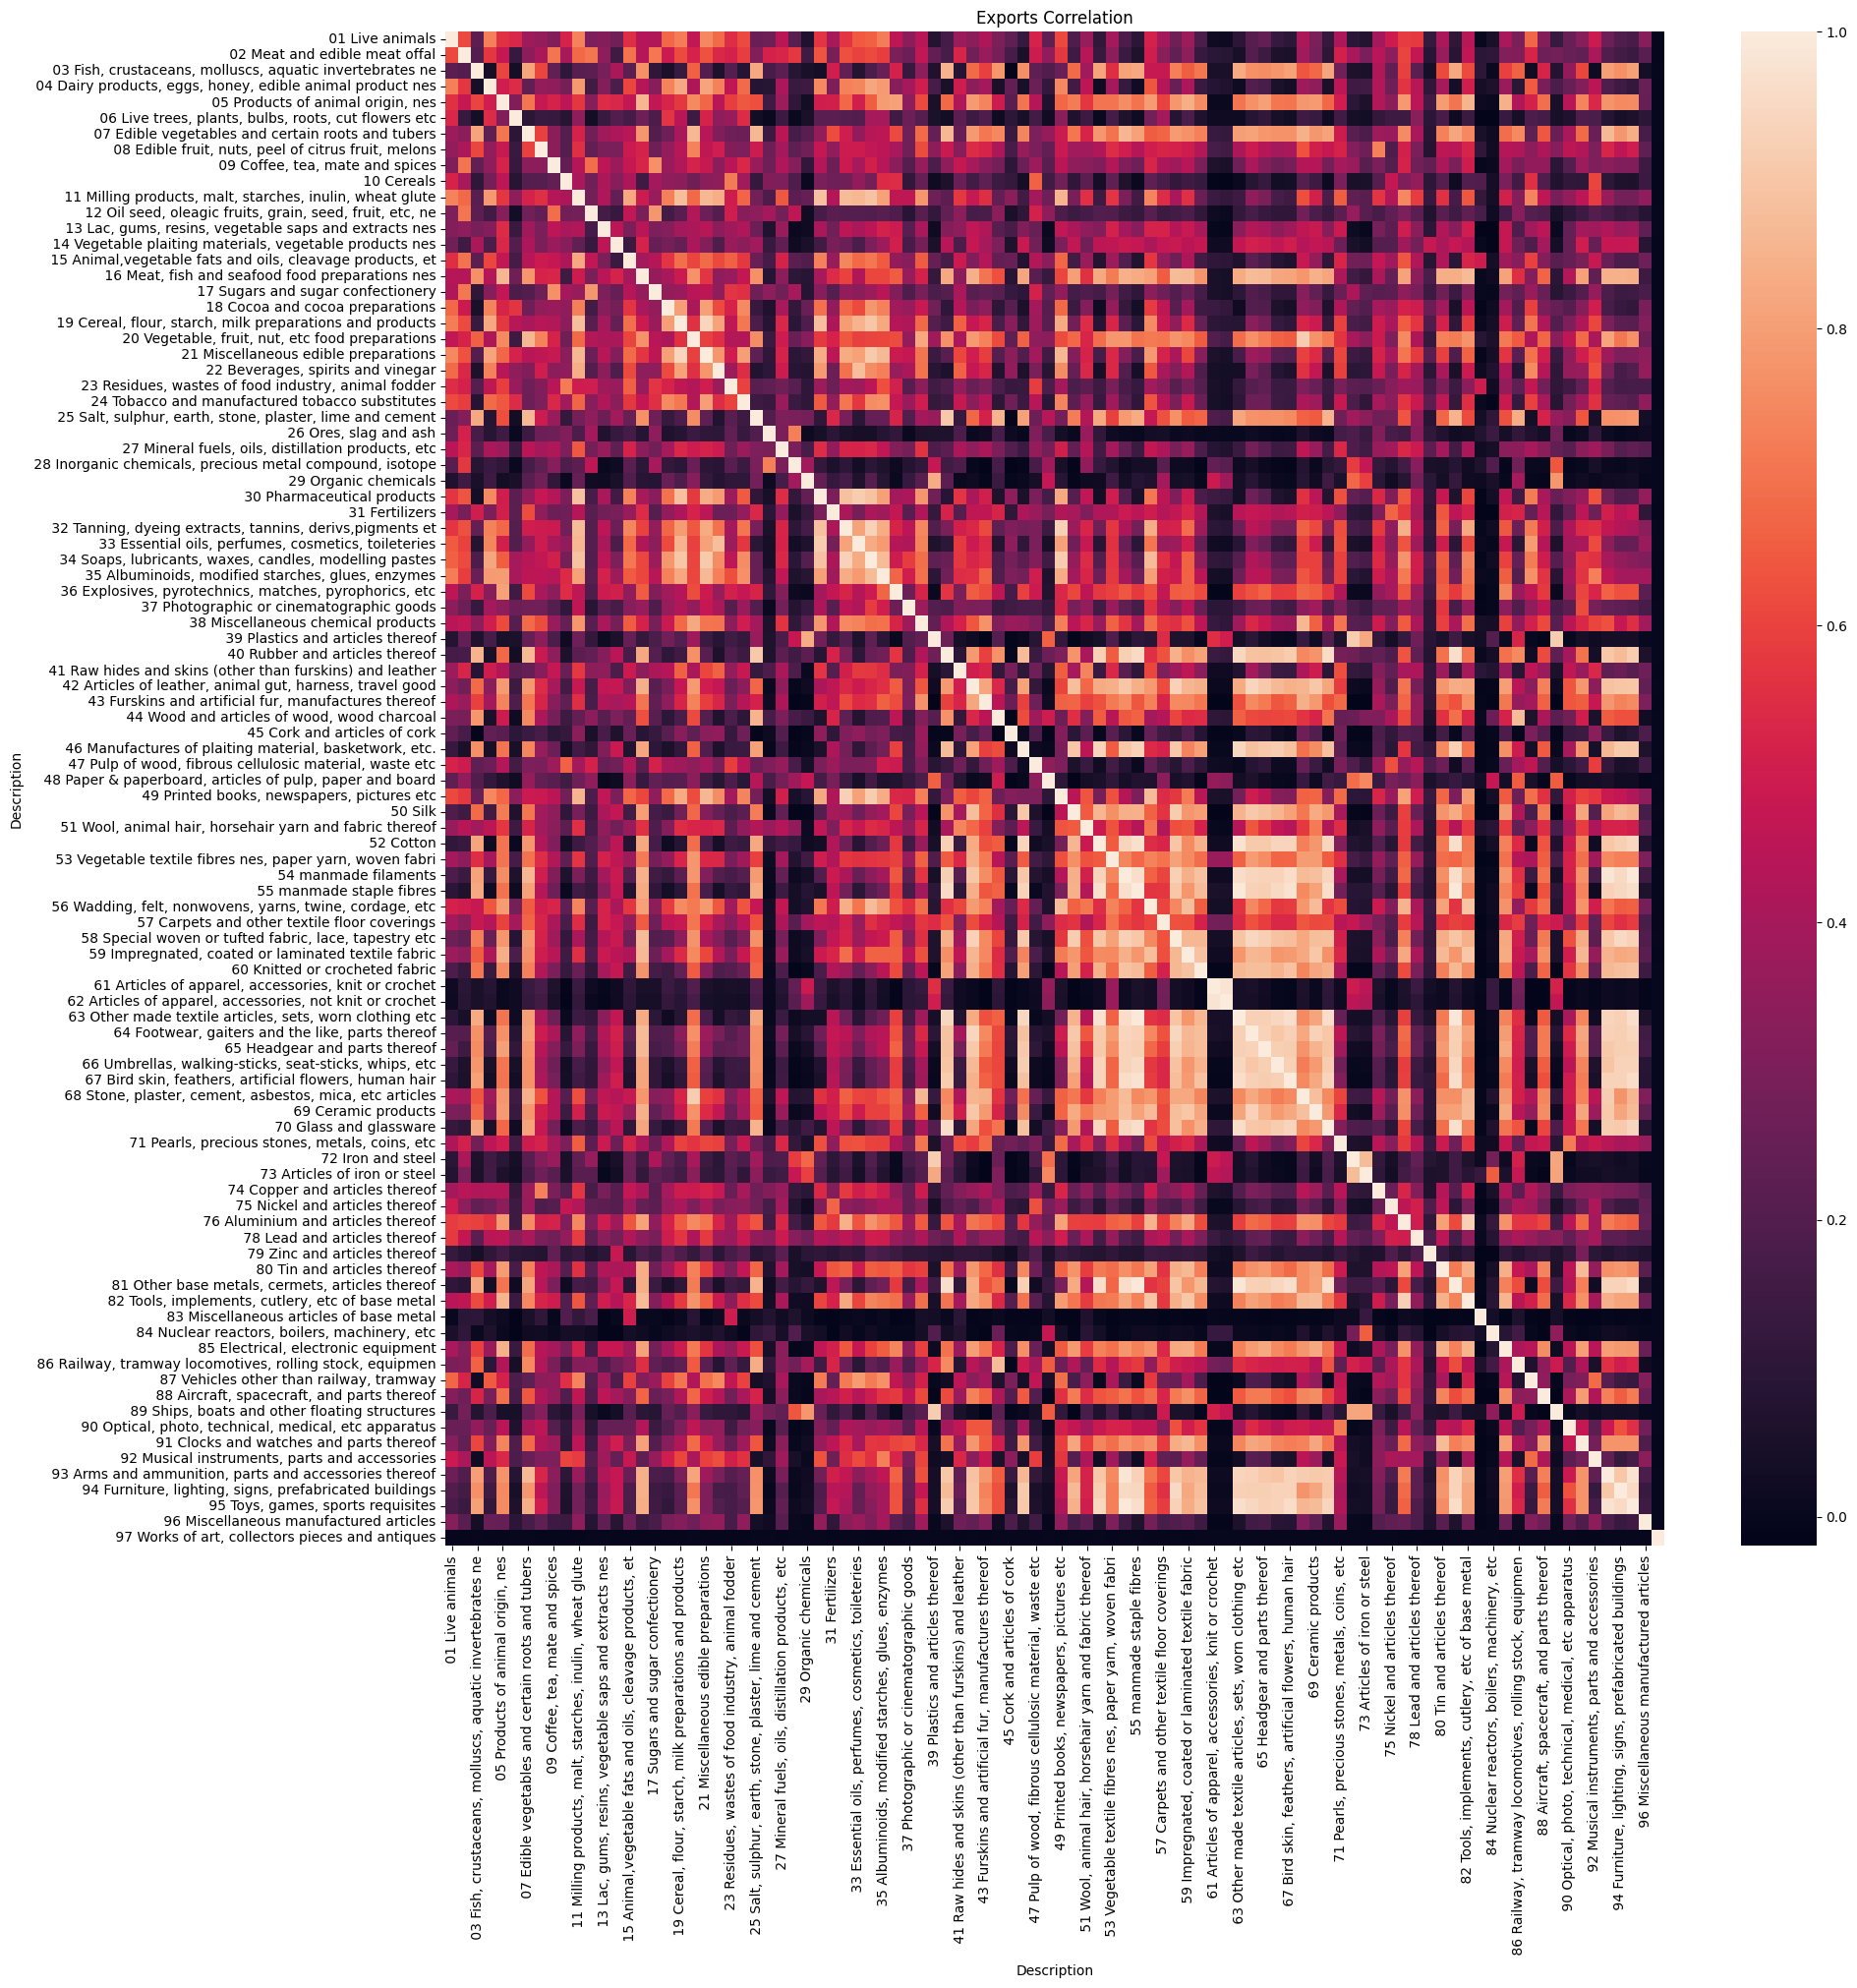

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Exports Correlation")
sns.heatmap(exports.iloc[:, 3:].corr())
plt.show()

In [ ]:
print('Highest Correlated Categories:')
get_top_abs_correlations(exports.iloc[:, 3:], n=20)

Highest Correlated Categories:


Description                                               Description                                              
 55 manmade staple fibres                                  81 Other base metals, cermets, articles thereof             0.993061
                                                           63 Other made textile articles, sets, worn clothing etc     0.989975
 54 manmade filaments                                      95 Toys, games, sports requisites                           0.989634
 63 Other made textile articles, sets, worn clothing etc   81 Other base metals, cermets, articles thereof             0.986323
 54 manmade filaments                                      93 Arms and ammunition, parts and accessories thereof       0.980928
 61 Articles of apparel, accessories, knit or crochet      62 Articles of apparel, accessories, not knit or crochet    0.977057
 55 manmade staple fibres                                  67 Bird skin, feathers, artificial flowers, human hair   

In [ ]:
print('Least Correlated Categories:')
get_least_abs_correlations(exports.iloc[:, 3:], n=20)

Least Correlated Categories:


Description                                                Description                                              
 29 Organic chemicals                                       96 Miscellaneous manufactured articles                      0.000082
                                                            87 Vehicles other than railway, tramway                     0.000173
 84 Nuclear reactors, boilers, machinery, etc               96 Miscellaneous manufactured articles                      0.000405
 26 Ores, slag and ash                                      46 Manufactures of plaiting material, basketwork, etc.      0.000503
 17 Sugars and sugar confectionery                          83 Miscellaneous articles of base metal                     0.000529
 39 Plastics and articles thereof                           60 Knitted or crocheted fabric                              0.000543
 45 Cork and articles of cork                               52 Cotton                                        

### These are a bit chaotic. So lets do some other analysis. Specifically clustering.

In [49]:
import numpy as np
import_array=np.array(imports.iloc[:, 3:].T)
export_array=np.array(exports.iloc[:, 3:].T)
print('import shape:', import_array.shape)
print('export shape:', export_array.shape)


import shape: (97, 3140)
export shape: (96, 3123)


In [88]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = range(2,24)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=10000, random_state=42)
    kmeans.fit(import_array)
    
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(import_array, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    distortions.append(sum(np.min(cdist(import_array, kmeans.cluster_centers_, 'euclidean'), axis=1)) / import_array.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[num_clusters] = sum(np.min(cdist(import_array, kmeans.cluster_centers_,'euclidean'), axis=1)) / import_array.shape[0]
    mapping2[num_clusters] = kmeans.inertia_



For n_clusters=2, the silhouette score is 0.9549988675347614
For n_clusters=3, the silhouette score is 0.8025018879591257
For n_clusters=4, the silhouette score is 0.7788736350309912
For n_clusters=5, the silhouette score is 0.7972371462313088
For n_clusters=6, the silhouette score is 0.6961897240691607
For n_clusters=7, the silhouette score is 0.4408001720835689
For n_clusters=8, the silhouette score is 0.46341166277329493
For n_clusters=9, the silhouette score is 0.38365441985874976
For n_clusters=10, the silhouette score is 0.40311924039626
For n_clusters=11, the silhouette score is 0.2905881081165971
For n_clusters=12, the silhouette score is 0.293345092628148
For n_clusters=13, the silhouette score is 0.28852615800089276
For n_clusters=14, the silhouette score is 0.2983756670110999
For n_clusters=15, the silhouette score is 0.2681056082476407
For n_clusters=16, the silhouette score is 0.27821881052606673
For n_clusters=17, the silhouette score is 0.24198903502794536
For n_clusters

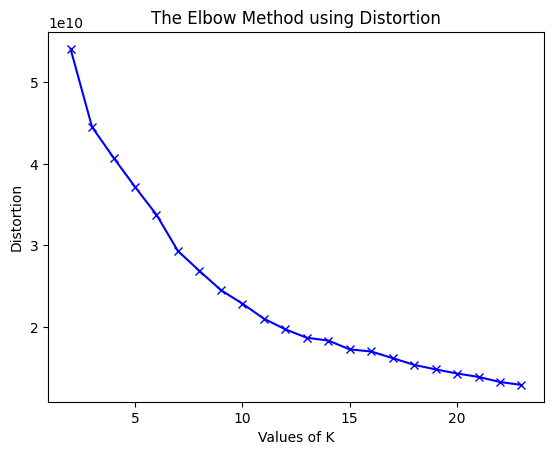

In [89]:
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [91]:
kmeans = KMeans(n_clusters=7, max_iter= 10000, random_state=42)
kmeans.fit(import_array)

KMeans(max_iter=10000, n_clusters=7, random_state=42)

In [92]:
import_kmeans=pd.DataFrame({
    'category': imports.columns.to_list()[3:],
    'group': kmeans.predict(import_array)
})
import_kmeans

,category,group
0,01 Live animals,2
1,02 Meat and edible meat offal,2
2,"03 Fish, crustaceans, molluscs, aquatic inver...",2
3,"04 Dairy products, eggs, honey, edible animal...",2
4,"05 Products of animal origin, nes",2
...,...,...
92,"94 Furniture, lighting, signs, prefabricated ...",0
93,"95 Toys, games, sports requisites",2
94,96 Miscellaneous manufactured articles,2
95,"97 Works of art, collectors pieces and antiques",2


In [93]:
import_kmeans.groupby(['group']).count()

,category
group,
0,15
1,1
2,76
3,1
4,1
5,1
6,2


In [96]:
for i in range (0,7):
    print("Categories in group {}".format(i))
    for j in import_kmeans[import_kmeans['group']==i]['category'].to_list():
        print(j)
    print('')

Categories in group 0
 08 Edible fruit, nuts, peel of citrus fruit, melons
 09 Coffee, tea, mate and spices
 12 Oil seed, oleagic fruits, grain, seed, fruit, etc, ne
 15 Animal,vegetable fats and oils, cleavage products, et
 23 Residues, wastes of food industry, animal fodder
 33 Essential oils, perfumes, cosmetics, toileteries
 38 Miscellaneous chemical products
 42 Articles of leather, animal gut, harness, travel good
 47 Pulp of wood, fibrous cellulosic material, waste etc
 64 Footwear, gaiters and the like, parts thereof
 74 Copper and articles thereof
 76 Aluminium and articles thereof
 88 Aircraft, spacecraft, and parts thereof
 93 Arms and ammunition, parts and accessories thereof
 94 Furniture, lighting, signs, prefabricated buildings

Categories in group 1
 27 Mineral fuels, oils, distillation products, etc

Categories in group 2
 01 Live animals
 02 Meat and edible meat offal
 03 Fish, crustaceans, molluscs, aquatic invertebrates ne
 04 Dairy products, eggs, honey, edible ani